In [ ]:
# TThisTThishishis Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!kaggle datasets download -d ezzzio/random-images
!unzip /content/skin-cancer-mnist-ham10000.zip
!unzip /content/random-images.zip


#import os
#for dirname, _, filenames in os.walk('/content/'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/image3052.jpg  
  inflating: dataset/train/image3055.jpg  
  inflating: dataset/train/image3056.jpg  
  inflating: dataset/train/image3057.jpg  
  inflating: dataset/train/image3059.jpg  
  inflating: dataset/train/image306.jpg  
  inflating: dataset/train/image3060.jpg  
  inflating: dataset/train/image3061.jpg  
  inflating: dataset/train/image3063.jpg  
  inflating: dataset/train/image3064.jpg  
  inflating: dataset/train/image3065.jpg  
  inflating: dataset/train/image3066.jpg  
  inflating: dataset/train/image3067.jpg  
  inflating: dataset/train/image3068.jpg  
  inflating: dataset/train/image3069.jpg  
  inflating: dataset/train/image307.jpg  
  inflating: dataset/train/image3072.jpg  
  inflating: dataset/train/image3075.jpg  
  inflating: dataset/train/image3078.jpg  
  inflating: dataset/train/image3080.jpg  
  inflating: dataset/train/image3083.jpg  
  inflating: dataset/train/image3085.jpg  
  inf

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("./hmnist_28_28_RGB.csv")
print(data.head())
meta_df = pd.read_csv("./HAM10000_metadata.csv")
printprintprintprintprintprintprint(meta_df.head())

   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166

In [ ]:
normaldata = pd.read_csv("./dataset/train.csv")
normaldata= pd.read_csv("./dataset/train.csv")
normaldata['Class'] = 7
normaldata.to_csv('./dataset/updated_file.csv', index=False)
normaldata.rename(columns={'Class': 'label'}, inplace=True)
print(normaldata.head())

           Image  label
0  image3476.jpg      7
1  image5198.jpg      7
2  image4183.jpg      7
3  image1806.jpg      7
4  image7831.jpg      7


In [ ]:
image_path = './dataset/train/'
normaldata['file_location'] = image_path + normaldata['Image'].astype(str)


In [ ]:
print(normaldata.head())

           Image  label                  file_location
0  image3476.jpg      7  ./dataset/train/image3476.jpg
1  image5198.jpg      7  ./dataset/train/image5198.jpg
2  image4183.jpg      7  ./dataset/train/image4183.jpg
3  image1806.jpg      7  ./dataset/train/image1806.jpg
4  image7831.jpg      7  ./dataset/train/image7831.jpg


In [ ]:
normaldata.shape

(6469, 3)

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm

image_data = []

for img_path in tqdm(normaldata['file_location']):
    try:
        img = Image.open(img_path)
        img = img.resize((28, 28)).convert('RGB')
        img_array = np.array(img)
        image_data.append(img_array.flatten())
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        image_data.append(np.zeros(28 * 28 * 3))

image_df = pd.DataFrame(image_data)
num_pixels = 28 * 28 * 3
image_df.columns = [f'pixel{i:04d}' for i in range(num_pixels)]


image_df['label'] = normaldata['label']

image_df.to_csv('./dataset/normaldatasetRGB.csv', index=False)

# Display the first few rows of the updated DataFrame
print(image_df.head())


100%|██████████| 6469/6469 [00:02<00:00, 2824.33it/s]


   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0         68        113         81         74        130         75   
1          5          4          2          3          2          0   
2         58         27         21         56         30         20   
3         11          8          1         11          8          1   
4        130        216        255        128        210        252   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0         55        106         52         74  ...        116        120   
1          2          1          1          3  ...        137        107   
2         78         54         43         66  ...        236        231   
3         11          8          1         11  ...         18         15   
4        127        204        250        125  ...          0          0   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        108        113        113        103

In [ ]:
image_df.shape

(6469, 2353)

In [ ]:
# Importing pandas
import pandas as pd

# Merging two CSV files
df = pd.concat(
    map(pd.read_csv, ['./dataset/normaldatasetRGB.csv','./hmnist_28_28_RGB.csv']),
    ignore_index=True
)

# Saving the merged DataFrame to a new CSV file
df.to_csv('./merged_RGB.csv', index=False)

# Print a message to confirm the file has been created
print("Merged CSV file created: merged_RGB.csv")


Merged CSV file created: merged_RGB.csv


In [ ]:
image_df.shape

(6469, 2353)

In [ ]:
data.shape

(10015, 2353)

In [ ]:
data=pd.read_csv('./merged_RGB.csv');
yData = data['label']
XData = data.drop(columns = ['label'])
# EDA
distribution = meta_df['dx'].value_counts()
distribution

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


In [ ]:
normaldata['dx'] = 'normal'
print(normaldata.head())
normaldata.to_csv('./dataset/updated_file.csv', index=False)


           Image  label                  file_location      dx
0  image3476.jpg      7  ./dataset/train/image3476.jpg  normal
1  image5198.jpg      7  ./dataset/train/image5198.jpg  normal
2  image4183.jpg      7  ./dataset/train/image4183.jpg  normal
3  image1806.jpg      7  ./dataset/train/image1806.jpg  normal
4  image7831.jpg      7  ./dataset/train/image7831.jpg  normal


In [ ]:
import pandas as pd

# Load the main data file
data = pd.read_csv('./merged_RGB.csv')

# Separate target and features
yData = data['label']
XData = data.drop(columns=['label'])

# Load the metadata and updated data files
meta_df = pd.read_csv('./HAM10000_metadata.csv')  # Assuming 'meta_file.csv' contains the 'dx' column
data2 = pd.read_csv('./dataset/updated_file.csv')  # Updated file with 'dx' set to 'normal'

# Count value distributions in the 'dx' columns for each file
distribution_meta = meta_df['dx'].value_counts()
distribution_data2 = data2['dx'].value_counts()

# Combine distributions by summing up counts for matching indices
combined_distribution = distribution_meta.add(distribution_data2, fill_value=0)

# Display combined distribution
print("Combined Distribution of 'dx':\n", combined_distribution)


Combined Distribution of 'dx':
 dx
akiec      327.0
bcc        514.0
bkl       1099.0
df         115.0
mel       1113.0
normal    6469.0
nv        6705.0
vasc       142.0
Name: count, dtype: float64


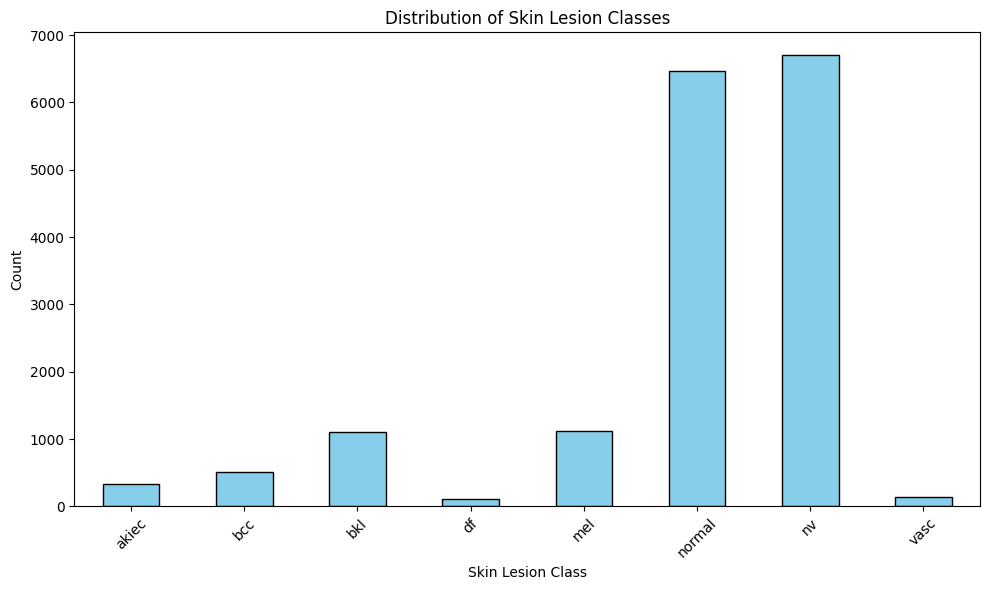

In [ ]:
combined_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Distribution of Skin Lesion Classes')
plt.xlabel('Skin Lesion Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler


sampler = RandomOverSampler()
XData, yData = sampler.fit_resample(XData, yData)


print("Shape after resampling:", XData.shape, yData.shape)


if XData.shape[1] == 2353:
    XData = XData.iloc[:, :-1]


XData = np.array(XData).reshape((-1, 28, 28, 3))


XData = XData / 255


print("Shape of XData after reshaping and normalization:", XData.shape)


Shape after resampling: (53640, 2352) (53640,)
Shape of XData after reshaping and normalization: (53640, 28, 28, 3)


In [ ]:
# Creating the train and validation set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(XData,yData, test_size=0.2)
Xtrain.shape, Xtest.shape

((42912, 28, 28, 3), (10728, 28, 28, 3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Conv2DTranspose, ZeroPadding2D, SpatialDropout2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

input_shape = (28, 28, 3)
num_classes = 8

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,           # Rotate images randomly
    width_shift_range=0.2,       # Shift images horizontally
    height_shift_range=0.2,      # Shift images vertically
    shear_range=0.2,             # Shear images
    zoom_range=0.2,              # Zoom in/out on images
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Filling strategy for pixels outside of the boundary
)

# Fit the generator to your data
datagen.fit(XData)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]
history = model.fit(
    datagen.flow(Xtrain, Ytrain, batch_size=32),  # Use the data generator for augmented data
    validation_data=(Xtest, Ytest),              # Validation data
    epochs=50,                                     # Number of epochs
    callbacks=callbacks                            # Defined callbacks for early stopping and learning rate adjustments
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1341/1341 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.3299 - loss: 2.1139 - val_accuracy: 0.5639 - val_loss: 1.1707 - learning_rate: 1.0000e-04
Epoch 2/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 71s 28ms/step - accuracy: 0.4591 - loss: 1.4974 - val_accuracy: 0.6048 - val_loss: 1.0409 - learning_rate: 1.0000e-04
Epoch 3/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.5192 - loss: 1.3061 - val_accuracy: 0.5810 - val_loss: 1.0829 - learning_rate: 1.0000e-04
Epoch 4/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.5512 - loss: 1.1942 - val_accuracy: 0.6119 - val_loss: 0.9974 - learning_rate: 1.0000e-04
Epoch 5/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.5733 - loss: 1.1328 - val_accuracy: 0.5596 - val_loss: 1.1028 - learning_rate: 1.0000e-04
Epoch 6/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5931 - loss: 1.0836 - val_accuracy: 0.4904 - val_loss: 1.2550 - learning_rate: 1.0000e-04
Epoch 7/50
1334/1341 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/s

Shape of XData after reshaping and normalization: (53640, 28, 28, 3)
Number of classes: 8
Unique values in yData: [0 1 2 3 4 5 6 7]
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1341/1341 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.4996 - loss: 1.3053 - val_accuracy: 0.5763 - val_loss: 1.0931 - learning_rate: 0.0010
Epoch 2/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.6563 - loss: 0.9130 - val_accuracy: 0.6178 - val_loss: 1.1858 - learning_rate: 0.0010
Epoch 3/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 91s 40ms/step - accuracy: 0.7170 - loss: 0.7580 - val_accuracy: 0.5195 - val_loss: 1.5993 - learning_rate: 0.0010
Epoch 4/50
1337/1341 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7543 - loss: 0.6591
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.7544 - loss: 0.6590 - val_accuracy: 0.5921 - val_loss: 1.3138 - learning_rate: 0.0010
Epoch 5/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 90s 39ms/step - accuracy: 0.7898 - loss: 0.5571 - val_accuracy: 0.7506 - val_loss: 0.6644 - learning_rate: 5.0000e-04
Epoch 6/50
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.801

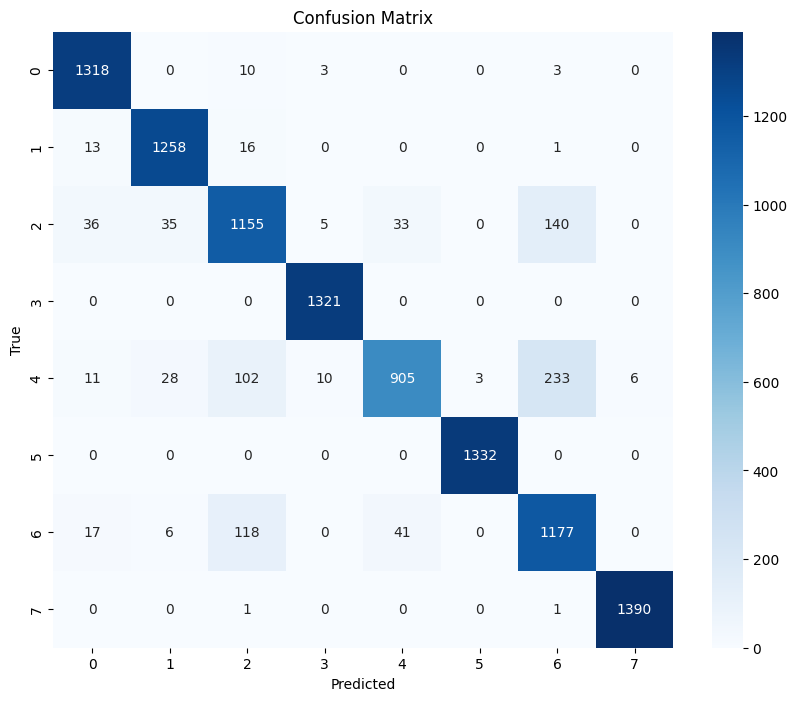

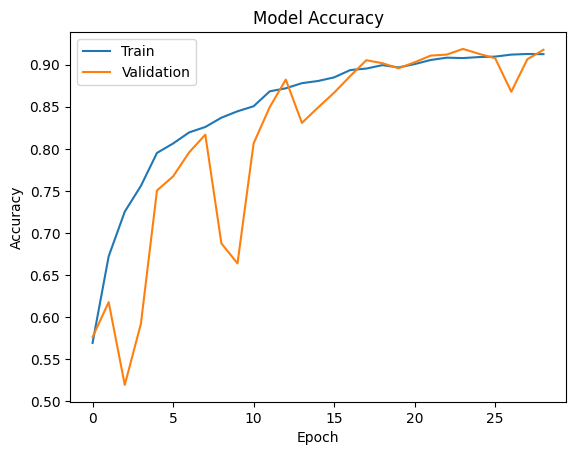

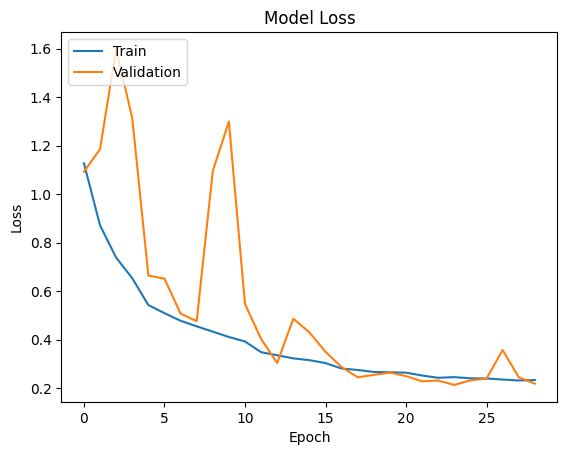

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data
data = pd.read_csv('./merged_RGB.csv')
XData = data.drop(columns=['label'])  # Assuming 'label' column is the target
yData = data['label']

# Ensure the labels are integer-encoded
encoder = LabelEncoder()
yData = encoder.fit_transform(yData)

# Fix class imbalance with RandomOverSampler
sampler = RandomOverSampler()
XData, yData = sampler.fit_resample(XData, yData)

# Reshape XData to 4D for ImageDataGenerator (assuming 28x28 RGB images)
XData = np.array(XData)
XData = XData.reshape((-1, 28, 28, 3))  # Reshape to (num_samples, 28, 28, 3)
XData = XData / 255.0  # Normalize pixel values
print("Shape of XData after reshaping and normalization:", XData.shape)

# Check unique labels in yData
num_classes = len(np.unique(yData))
print("Number of classes:", num_classes)
print("Unique values in yData:", np.unique(yData))

from sklearn.model_selection import train_test_split
Xtrain, X_val, Ytrain, y_val = train_test_split(XData, yData, test_size=0.2, random_state=42)  # Added random_state for reproducibility

def hybrid_nn_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional Layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Average Pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)

    # Adding an LSTM layer for sequential processing
    # Reshape to fit LSTM input shape
    x = layers.Reshape((-1, 128))(x)  # Assuming 128 channels
    x = layers.LSTM(64, return_sequences=False)(x)

    # Fully Connected Layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Parameters for the model
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(XData)

input_shape = (28, 28, 3)  # Correct input shape for image data (28x28 RGB images)
# Compile and fit the model
HybridNN = hybrid_nn_model(input_shape, num_classes)
HybridNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

# Train the model
history = HybridNN.fit(
    datagen.flow(Xtrain, Ytrain, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks
)



# Evaluate the model
train_loss, train_accuracy = HybridNN.evaluate(Xtrain, Ytrain)
val_loss, val_accuracy = HybridNN.evaluate(X_val, y_val)
print(f"Training accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")

# Predictions and Confusion Matrix
y_pred = HybridNN.predict(X_val)
predicted_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_val, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(yData), yticklabels=np.unique(yData))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = HybridNN.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_accuracy:.4f}")


336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9226 - loss: 0.2043
Validation accuracy: 0.9187


In [ ]:
HybridNN.save('./skin_cancerr.h5')

In [ ]:
HybridNN.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929,754 (3.55 MB)

 Trainable params: 309,768 (1.18 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 619,538 (2.36 MB)